In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator
from sympy import *
#from sympy.physics.quantum.dagger import Dagger
#init_printing(use_latex='mathjax')

Seja o potencial da forma

$$ V(r)= 4{V}_0 \left[ \left( \frac{s}{r} \right)^{12} - \left( \frac{s}{r} \right)^{6} \right]^{2}$$

com $V_0$ e $s$ parâmetros constantes e reais, enquanto $r$ representa a distancia de um objeto físico à origem do potencial. Podemos defini-lo simbolicamente dentro do python como:

In [2]:
V_0 = symbols('V_0',real=True)
s = symbols('s',real=True)
r = symbols('r', positive=True)


V= 4*V_0*((s/r)**(12) - (s/r)**6)**2

display(V)

4*V_0*(-s**6/r**6 + s**12/r**12)**2

O mesmo pode ser presentado gráficamente como:

Text(0, 0.5, '$V(V_0)$')

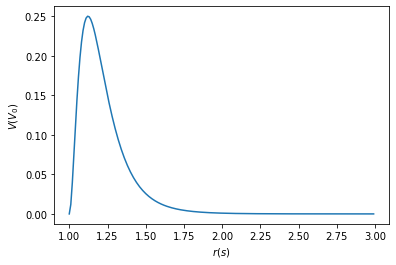

In [3]:
fig, ax = plt.subplots()
x = np.arange(1, 3, 0.01)
f1 = lambdify(r, V.subs(V_0,1).subs(s,1), "numpy") #Aqui traduz-se uma função do sympy para o numpy, substituindo alguns valores
y=f1(x)

ax.plot(x, y)
plt.xlabel(r"$r(s)$")
plt.ylabel(r"$V(V_0)$")


Vamos encontrar simbólicamente o mínimo deste potencial. Primeiramente encontrando a derivada primeira do potencial:
$$ \frac{d V(r)}{dr} $$

In [4]:
dV1 = diff(V, r)
display(dV1)

4*V_0*(12*s**6/r**7 - 24*s**12/r**13)*(-s**6/r**6 + s**12/r**12)

O mínimo ocorre quando a derivada primeira é zero. Ou seja

In [5]:
solve(dV1,r)

[-s,
 s,
 -2**(1/6)*s,
 2**(1/6)*s,
 s*(-1/2 - sqrt(3)*I/2),
 s*(-1/2 + sqrt(3)*I/2),
 s*(1/2 - sqrt(3)*I/2),
 s*(1/2 + sqrt(3)*I/2),
 s*(-2**(1/6)/2 - 2**(1/6)*sqrt(3)*I/2),
 s*(-2**(1/6)/2 + 2**(1/6)*sqrt(3)*I/2),
 s*(2**(1/6)/2 - 2**(1/6)*sqrt(3)*I/2),
 s*(2**(1/6)/2 + 2**(1/6)*sqrt(3)*I/2)]

Como $r$ só pode assumir valores positivos e reais (ja que é uma posição), então temos apenas uma solução:

In [6]:
r0=solve(dV1,r)[1]
display(r0)

s

Podemos agora calcular a derivada segunda exatamente no ponto de mínimo e encontrar a expressão para a constante elástica deste potencial
$$ k = \frac{d^2V(r_0)}{dr^2} $$

In [7]:
dV2 = diff(dV1, r)
display(dV2.subs(r,r0))

288*V_0/s**2

**Faça o mesmo exercício agora para o seguinte potencial
$$ V(r) = D \left[ 1 - e^{-a (r - r_e)} \right]$$
e encontre o ponto de mínimo e a sua constante elástica em termos dos parâmetros $D$ e $r_e$**

In [8]:
D = symbols('D',real=True)
a = symbols('a',real=True)
r = symbols('r', positive=True)
r_e = symbols('r_e', real=True)


V= D * (1-exp(-a*(r-r_e)))**2

display(V)

D*(1 - exp(-a*(r - r_e)))**2

Text(0, 0.5, '$V(V_0)$')

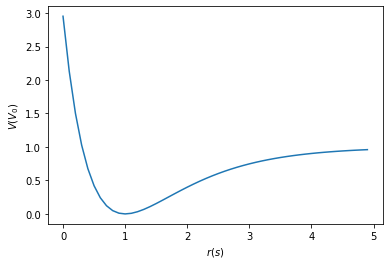

In [11]:
fig, ax = plt.subplots()
x = np.arange(0, 5, 0.1)
f1 = lambdify(r, V.subs(D,1).subs(r_e,1).subs(a,1), "numpy") #Aqui traduz-se uma função do sympy para o numpy, substituindo alguns valores
y = f1(x)


ax.plot(x, y)
plt.xlabel(r"$r(s)$")
plt.ylabel(r"$V(V_0)$")

In [12]:
print("Primeira derivada do potencial V(r) em função de r_e")
dV1 = diff(V, r_e)
display(dV1)

print()

print("Ponto de mínima")
solve(dV1,r_e)

r0=solve(dV1,r_e)
display(r0)

print()
print("Derivada segunda no ponto de mínima (constante elastica)")
dV2 = diff(dV1, r_e)
display(dV2.subs(r_e,r0))

Primeira derivada do potencial V(r) em função de r_e


-2*D*a*(1 - exp(-a*(r - r_e)))*exp(-a*(r - r_e))


Ponto de mínima


[r]


Derivada segunda no ponto de mínima (constante elastica)


-2*D*a**2*(1 - exp(-a*(r - r_e)))*exp(-a*(r - r_e)) + 2*D*a**2*exp(-2*a*(r - r_e))